In [37]:
import pandas as pd

# 測試資料
df = pd.read_csv("https://streamlit-demo-data.s3-us-west-2.amazonaws.com/agri.csv.gz")
df = df.set_index("Region")
# 顯示 DataFrame
df.head()

,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007
Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
China,58340740.0,60690860.0,63942700.0,68462610.0,74747900.0,80445930.0,81718660.0,81474800.0,82195340.0,86542200.0,90085190.0,88668910.0,98613730.0,98786610.0,100902900.0,100068700.0,102256200.0,112352200.0,116862200.0,117802300.0,123609600.0,134887200.0,144335500.0,157689000.0,156197000.0,160571200.0,169315100.0,174290700.0,179084400.0,192616000.0,199926200.0,209312400.0,226179800.0,236648000.0,255004400.0,271766600.0,284542100.0,295117400.0,304490200.0,315511100.0,322771800.0,336394800.0,340623800.0,360834700.0,371939300.0,380320200.0,386448200.0
United States of America,89816580.0,90275010.0,93700380.0,94323650.0,97704050.0,97277180.0,101177900.0,103420600.0,104285200.0,102786400.0,111234700.0,111439800.0,113008600.0,110119400.0,117511000.0,120877500.0,126192700.0,126211800.0,133091500.0,127118400.0,139390800.0,139500900.0,119197600.0,136529200.0,143144600.0,136708300.0,136752700.0,126910100.0,138218400.0,144644000.0,143249500.0,155467400.0,142796300.0,164433800.0,152325500.0,162066800.0,167072000.0,167311700.0,170083400.0,173640200.0,170755800.0,167494400.0,172458200.0,183519100.0,181432900.0,176803000.0,184698800.0
India,50142680.0,50015760.0,51367730.0,52267720.0,49498330.0,49309560.0,52731470.0,55208160.0,56970870.0,60053830.0,61559940.0,58725260.0,63310020.0,61161410.0,67573710.0,66914630.0,72476440.0,75273500.0,71872960.0,74076420.0,79854310.0,79127070.0,88341420.0,90441380.0,93183620.0,93067530.0,92052060.0,102021900.0,109289000.0,109854700.0,110870700.0,115959300.0,119014000.0,123259200.0,126802000.0,132327200.0,134052000.0,137406600.0,143567200.0,142989200.0,147351100.0,137112300.0,151552000.0,149552600.0,156869200.0,164974800.0,175747700.0
USSR,72768810.0,73961920.0,70531000.0,81216890.0,80941960.0,90781310.0,92659220.0,98507460.0,93745540.0,100571500.0,101134000.0,96571510.0,112866600.0,107019900.0,101590100.0,110860100.0,111201700.0,118495100.0,110892400.0,107927700.0,104772600.0,111172200.0,115414900.0,114809500.0,114891200.0,122372300.0,121626500.0,121102700.0,125996600.0,126241300.0,111884500.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Brazil,16564600.0,17344940.0,17443010.0,17658130.0,20367240.0,19238750.0,20650260.0,21256810.0,22008700.0,22533890.0,23583120.0,24726620.0,24599650.0,26386030.0,27173810.0,28353660.0,30125560.0,29605350.0,31451560.0,34909200.0,36180910.0,36635890.0,36707840.0,38756650.0,42469060.0,40969750.0,44823570.0,46291220.0,48140150.0,45956520.0,48781430.0,51768700.0,52008700.0,55538480.0,58603010.0,57776820.0,60006520.0,60706480.0,65353180.0,67416260.0,71250310.0,75603330.0,81198510.0,85626940.0,87363190.0,85319580.0,90075170.0


In [38]:
df = df.T.reset_index()
df.head()

Region,index,China,United States of America,India,USSR,Brazil,France,Germany,Italy,Argentina,Indonesia,Turkey,Poland,Spain,Pakistan,Mexico,Japan,Canada,United Kingdom,Russian Federation,Australia,Nigeria,Thailand,"Iran, Islamic Republic of",Netherlands,Bangladesh,Egypt,Viet Nam,Romania,Philippines,South Africa,Colombia,Ukraine,Hungary,"Korea, Republic of",New Zealand,Greece,Myanmar,Yugoslav SFR,Denmark,Malaysia,Czechoslovakia,Bulgaria,Sudan,Austria,Belgium-Luxembourg,Uganda,Chile,Morocco,Ireland,Peru,Portugal,"Venezuela, Bolivarian Republic of",Syrian Arab Republic,Sweden,"Congo, Democratic Republic of","Tanzania, United Republic of",Kenya,Côte d'Ivoire,...,Iceland,Martinique,Kuwait,Guadeloupe,Belize,Timor-Leste,Malta,Solomon Islands,Eritrea,Vanuatu,Barbados,Samoa,Comoros,Luxembourg,Equatorial Guinea,Saint Lucia,Djibouti,Tonga,Dominica,French Polynesia,Cape Verde,New Caledonia,Qatar,Bahrain,Saint Vincent and Grenadines,Grenada,Bahamas,Sao Tome and Principe,Kiribati,Brunei Darussalam,Pacific Is,French Guiana,Maldives,Saint Kitts and Nevis,Falkland Islands,Seychelles,Montenegro,Guam,Antigua and Barbuda,Cook Islands,Western Sahara,Liechtenstein,US Virgin Islands,Wallis and Futuna Islands,"Micronesia, Federated States of",Montserrat,Bermuda,American Samoa,Netherlands Antilles,Faroe Islands,Niue,Marshall Islands,Greenland,British Virgin Islands,Tuvalu,Nauru,Tokelau,Cayman Islands,Saint Pierre and Miquelon
0,1961,58340740.0,89816580.0,50142680.0,72768810.0,16564600.0,23408500.0,22077690.0,18638310.0,11950390.0,7383684.0,9801625.0,15955180.0,9798405.0,6247493.0,6632554.0,11464360.0,8246525.0,10620960.0,0.0,8033542.0,6075942.0,4480766.0,2997640.0,4700973.0,5295969.0,3361283.0,3471556.0,5358930.0,3351690.0,3986965.0,3135949.0,0.0,3887535.0,2168330.0,3518831.0,3427934.0,2412070.0,5008954.0,3800428.0,1182611.0,4601178.0,2842766.0,1778896.0,2837223.0,3100848.0,1792407.0,1740947.0,1345720.0,2012922.0,1660129.0,2399998.0,1089290.0,971692.0,2604352.0,1765428.0,1216270.0,1083843.0,852070.0,...,67363.0,69168.0,12130.0,77672.0,17661.0,32059.0,28688.0,24807.0,0.0,29225.0,38949.0,26742.0,18693.0,0.0,34500.0,23108.0,5070.0,25489.0,12810.0,19662.0,10914.0,16888.0,3475.0,7649.0,13593.0,11834.0,7088.0,14715.0,8037.0,4876.0,10744.0,3249.0,4108.0,10359.0,5794.0,5629.0,0.0,2185.0,6124.0,4821.0,1511.0,1507.0,3821.0,1870.0,0.0,1253.0,2086.0,1750.0,1262.0,251.0,498.0,0.0,430.0,717.0,473.0,184.0,170.0,0.0,0.0
1,1962,60690860.0,90275010.0,50015760.0,73961920.0,17344940.0,26654000.0,24241470.0,19289340.0,12519320.0,8054871.0,10152630.0,14575640.0,9825465.0,6589936.0,7098856.0,12075860.0,9913775.0,11154420.0,0.0,9014986.0,6347033.0,4802374.0,3098577.0,4877780.0,5038676.0,4024906.0,3677532.0,5022678.0,3604865.0,4022348.0,3391935.0,0.0,3993613.0,2062573.0,3680832.0,3084512.0,2728966.0,5175146.0,3833062.0,1204312.0,4374112.0,3141124.0,1909400.0,2808626.0,3183065.0,1791975.0,1811248.0,1584064.0,1972534.0,1730573.0,2679394.0,1122562.0,1297812.0,2615670.0,1782812.0,1257883.0,1128866.0,880386.0,...,70227.0,70246.0,12375.0,77636.0,15120.0,32363.0,27868.0,25101.0,0.0,29228.0,40519.0,28757.0,18812.0,0.0,39709.0,24780.0,5199.0,23174.0,12329.0,22214.0,11511.0,16967.0,4026.0,7705.0,13985.0,12680.0,7348.0,15493.0,7436.0,5712.0,10970.0,3648.0,4275.0,9834.0,6177.0,6017.0,0.0,2323.0,6084.0,4717.0,886.0,1594.0,4143.0,1876.0,0.0,1320.0,2127.0,1785.0,1364.0,239.0,571.0,0.0,513.0,708.0,474.0,184.0,220.0,0.0,0.0
2,1963,63942700.0,93700380.0,51367730.0,70531000.0,17443010.0,25202710.0,25340780.0,18918070.0,13694660.0,7650931.0,10635830.0,15858570.0,11420400.0,6897616.0,7394225.0,12370320.0,10751080.0,11093710.0,0.0,9354546.0,6669741.0,5134577.0,3067630.0,4875756.0,5590852.0,4121380.0,3677420.0,5096700.0,3745430.0,4247542.0,3364217.0,0.0,4320800.0,2259366.0,3735158.0,3401255.0,2863719.0,5524450.0,3823419.0,1265997.0,4793068.0,3216790.0,1946882.0,2996174.0,3156997.0,1992587.0,1835588.0,1703285.0,1966425.0,1725425.0,2792918.0,1182825.0,1221667.0,2614808.0,1793419.0,1380618.0,1129384.0,

In [39]:
df = pd.melt(df, id_vars=["index"]).rename(
            columns={"index": "year", "value": "Gross Agricultural Product ($B)"}
        )
df.head()

,year,Region,Gross Agricultural Product ($B)
0,1961,China,58340740.0
1,1962,China,60690860.0
2,1963,China,63942700.0
3,1964,China,68462610.0
4,1965,China,74747900.0


In [40]:
df['Gross Agricultural Product ($B)'] = df['Gross Agricultural Product ($B)'] / 1000000.0

In [42]:
df = df[df.Region == 'China']

<Axes: xlabel='year', ylabel='Gross Agricultural Product ($B)'>

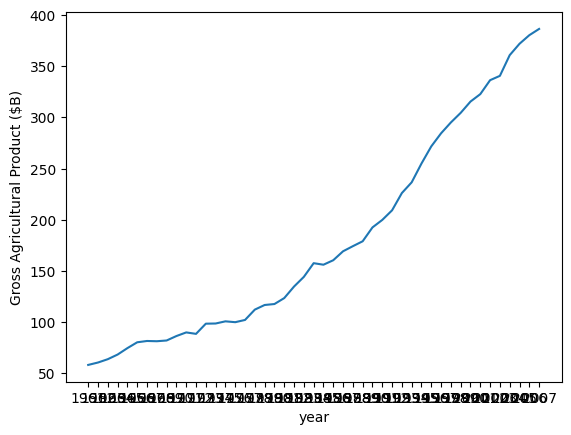

In [43]:
import seaborn as sns

sns.lineplot(x='year', y='Gross Agricultural Product ($B)', data=df)